In [1]:
models <- c('m1','m2','m3','m4','m5','m6')
# models <- c('m1','m2')
#    'm1': '../stancode/matrixmodel_estinilnorm_monodelta_respv2_normparam_trackgrowth_xval.stan',
#   'm2': '../stancode/matrixmodel_estinilnorm_monodelta-lightsig_respv2_normparam_trackgrowth_xval.stan'

SF=ZN <- list()
for(i in 1:length(models)){
    #SF[[i]] <- read.csv(paste('fit',models[i],'seaflow.csv',sep='_'))
    ZN[[i]] <- read.csv(paste('fit',models[i],'zinser.csv',sep='_'))
}

In [5]:
str(ZN[[1]])

'data.frame':	4000 obs. of  709 variables:
 $ chain             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ draw              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ warmup            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ delta_lambda      : num  2.09 1.91 2.6 1.17 2.1 ...
 $ delta_max_incr.1. : num  8.44e-04 1.32e-04 6.11e-05 5.03e-03 5.76e-02 ...
 $ delta_max_incr.2. : num  0.0242 0.0321 0.0361 0.0438 0.0137 ...
 $ delta_max_incr.3. : num  0.0036 0.00842 0.07695 0.01373 0.03857 ...
 $ delta_max_incr.4. : num  0.01272 0.00458 0.04841 0.009 0.00168 ...
 $ delta_max_incr.5. : num  0.00925 0.01066 0.03177 0.06461 0.0016 ...
 $ delta_max_incr.6. : num  0.0491 0.046 0.0154 0.012 0.0471 ...
 $ delta_max_incr.7. : num  0.03471 0.06908 0.00398 0.00693 0.02161 ...
 $ delta_max_incr.8. : num  0.02619 0.00278 0.07349 0.0154 0.04222 ...
 $ delta_max_incr.9. : num  0.0381 0.0316 0.0199 0.0477 0.0366 ...
 $ delta_max_incr.10.: num  0.02111 0.05008 0.09542 0.08831 0.00936 ...
 $ delta_max_incr.11.: num  0.22234 0.12216

In [13]:
pars <- c('gamma_max','respiration','E_star','w_ini_mu','w_ini_sigma','divrate')

PARS_sf=PARS_zn   <- array(NA,dim=c(dim(ZN[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models)){
    pars_sf=pars_zn                     <- matrix(NA,dim(ZN[[1]])[1],length(pars))
    colnames(pars_sf)=colnames(pars_zn) <- pars
    for(i in 1:length(pars)){
        #pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
    }
    #PARS_sf[,,j] <- pars_sf
    PARS_zn[,,j] <- pars_zn
}


In [ ]:
# options(repr.plot.width=8, repr.plot.height=5)
# par(mfrow=c(2,3),mar=c(3,2,3,3))
# for(i in 1:length(pars)){
#     hist(PARS_sf[,i,1],main='',breaks=20,xlab='',freq=TRUE,
#          xlim=range(c(PARS_sf[,i,])),col=adjustcolor('black',alpha.f=0.5),ylim=c(0,800))
#     for(j in 2:length(models)){
#         hist(PARS_sf[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
#     }
#     mtext(pars[i])
#     if(i==1)
#         legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
# }


In [ ]:
# options(repr.plot.width=8, repr.plot.height=5)
# par(mfrow=c(3,2),mar=c(3,2,3,3))
# for(i in 1:length(pars)){
#     plot(PARS_zn[,i,1],main='',xlab='',col=adjustcolor('black',alpha.f=0.5),bty='n')
#     for(j in 2:length(models)){
#         lines(PARS_zn[,i,j],col=adjustcolor(j,alpha.f=0.5))
#     }
#     mtext(pars[i])
#     if(i==1)
#         legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
# }


In [ ]:
#options(repr.plot.width=8, repr.plot.height=5)
#par(mfrow=c(2,3),mar=c(3,2,3,3))
#for(i in 1:length(pars)){
#    xtmp <- PARS_sf[,i,1]
#    d <- density(xtmp)
#    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_sf[,i,])),col='black',type='l')
#    for(j in 2:length(models)){
#        xtmp <- PARS_sf[,i,j] 
#        d <- density(xtmp)
#        lines(d$x,d$y/max(d$y),col=j)
#    }
#    mtext(pars[i])
#    if(i==1)
#        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
#}


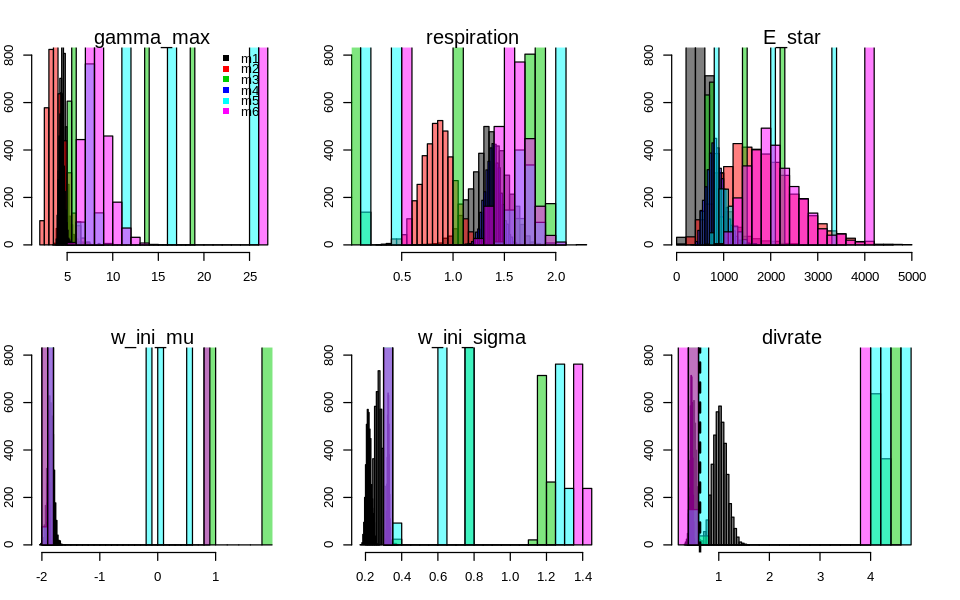

In [14]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,3),mar=c(3,2,3,3))
for(i in 1:length(pars)){
    hist(PARS_zn[,i,1],main='',breaks=20,xlab='',freq=TRUE,xlim=range(c(PARS_zn[,i,])),col=adjustcolor('black',alpha.f=0.5),
        ylim=c(0,800))
    for(j in 2:length(models)){
        hist(PARS_zn[,i,j],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
    }
    mtext(pars[i])
    if(i==1) legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
    if(i==6) abline(v=0.63,lty=2,lwd=2)
}

In [ ]:
# options(repr.plot.width=8, repr.plot.height=5)
# par(mfrow=c(2,3),mar=c(3,2,3,3))
# for(i in 1:length(pars)){
#    xtmp <- PARS_zn[,i,1]
#    d <- density(xtmp)
#    plot(d$x,d$y/max(d$y),xlab='', xlim=range(c(PARS_zn[,i,])),col='black',type='l')
#    for(j in 2:length(models)){
#        xtmp <- PARS_zn[,i,j] 
#        d <- density(xtmp)
#        lines(d$x,d$y/max(d$y),col=j)
#    }
#    mtext(pars[i])
#    if(i==1)
#        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')
# }

In [ ]:
pars <- c('log_like_test','lp__')

ll_sf=ll_zn   <- array(NA,dim=c(dim(ZN[[1]])[1],length(pars),length(models)))
#colnames(pars_sf)=colnames(pars_zn) <- pars
for(j in 1:length(models)){
    pars_sf=pars_zn                     <- matrix(NA,dim(ZN[[1]])[1],length(pars))
    colnames(pars_sf)=colnames(pars_zn) <- pars
    for(i in 1:length(pars)){
        pars_sf[,i] <- SF[[j]][,grep(pars[i],colnames(SF[[j]]))]
        pars_zn[,i] <- ZN[[j]][,grep(pars[i],colnames(ZN[[j]]))]
    }
    ll_sf[,,j] <- pars_sf
    ll_zn[,,j] <- pars_zn
}

In [ ]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2),mar=c(3,2,3,3))

    hist(ll_sf[,1,1],main='',breaks=20,xlab='',freq=TRUE,col=adjustcolor('black',alpha.f=0.5),ylim=c(0,800))
    hist(ll_sf[,1,2],main='',,breaks=20,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
        mtext('Likelihood of test set (SeaFlow)')
        legend('topright',legend=models,col=1:length(models),pch=15,bty='n')

    hist(ll_zn[,1,1],main='',breaks=30,xlab='',freq=TRUE,col=adjustcolor('black',alpha.f=0.5), ylim=c(0,800))
    hist(ll_zn[,1,2],main='',,breaks=30,xlab='',freq=TRUE,col=adjustcolor(j,alpha.f=0.5),add=TRUE)
        mtext('Likelihood of test set (Zinser)')

In [ ]:
m1_prior <- read.csv(paste('prior_','m1p','.csv',sep=''))
m2_prior <- read.csv(paste('prior_','m2p','.csv',sep=''))

In [ ]:
m1_div_prior <- m1_prior[,colnames(m1_prior)=='divrate']
m2_div_prior <- m2_prior[,colnames(m2_prior)=='divrate']

In [ ]:
bb <- adjustcolor('blue',alpha.f=0.4)
rr <- adjustcolor('red',alpha.f=0.4)

j=1

library(FNN)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(2,3),mar=c(2,2,2,2))              #gamma_max ~ uniform(0.0,1440.0/dt);
    xin  <- seq(0,1440/20,length.out=4000) 
    post_sf <- SF[[j]][,grep('gamma_max',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('gamma_max',colnames(ZN[[j]]))] 
    plot(xin,dunif(xin,0,1440/20),ylim=c(0,1),type='l',bty='n')
    hist(post_sf,add=TRUE,freq=FALSE,col=rr);              hist(post_zn,add=TRUE,freq=FALSE,col=bb)
            mtext('gamma_max',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0,1440/20))),3)),adj=1,col='red')
                                      mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0,1440/20))),3)),adj=1,line=-2,col='blue')

    xin  <- seq(0,10,length.out=4000)      # respiration ~ uniform(0.0,10.0);
    post_sf <- SF[[j]][,grep('respiration',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('respiration',colnames(ZN[[j]]))]
    plot(xin,dunif(xin,0,10),ylim=c(0,3),type='l',bty='n')
    hist(post_sf,add=TRUE,freq=FALSE,col=rr);      hist(post_zn,add=TRUE,freq=FALSE,col=bb) 
            mtext('respiration',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0,10))),3)),adj=1,col='red')
                                        mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0,10))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(0,5000,length.out=4000)     #    E_star ~ normal(1000.0,1000.0);
    post_sf <- SF[[j]][,grep('E_star',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('E_star',colnames(ZN[[j]]))]
    plot(xin,dnorm(xin,mean=1000,sd=1000),type='l',bty='n',ylim=c(0,10e-4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=20,col=rr);  hist(post_zn,add=TRUE,freq=FALSE,col=bb)
            mtext('E_star',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,rnorm(4000,mean=1000,sd=1000))),3)),adj=1,col='red')
                                   mtext(paste(round(mean(KL.divergence(post_zn,rnorm(4000,mean=1000,sd=1000))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(-6,0,length.out=1000)     #    w_ini_mu ~ normal(-3.0, 1.0);
    post_sf <- SF[[j]][,grep('w_ini_mu',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('w_ini_mu',colnames(ZN[[j]]))]
    plot(xin,dnorm(xin,mean=-3,sd=1),type='l',bty='n',ylim=c(0,4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=10,col=rr);  hist(post_zn,add=TRUE,freq=FALSE,col=bb,breaks=6)
            mtext('w_ini_mu',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,rnorm(4000,mean=-3,sd=1))),3)),adj=1,col='red')
                                     mtext(paste(round(mean(KL.divergence(post_zn,rnorm(4000,mean=-3,sd=1))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(0.03,3,length.out=1000)     #    w_ini_sigma ~ uniform(0.03, 3.0);
    post_sf <- SF[[j]][,grep('w_ini_sigma',colnames(SF[[j]]))];  post_zn <- ZN[[j]][,grep('w_ini_sigma',colnames(ZN[[j]]))];  
    plot(xin,dunif(xin,0.03,3),type='l',bty='n',ylim=c(0,4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=7,col=rr); hist(post_zn, add=TRUE, freq=FALSE, breaks=7,col=bb)
            mtext('w_ini_sigma',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0.03,3))),3)),adj=1,col='red')
                                        mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0.03,3))),3)),adj=1,col='blue',line=-2)
 
    xin  <- seq(0,max(div_prior),length.out=1000) 
    hist(m1_div_prior,main='',breaks=20,col='grey',freq=FALSE,ylim=c(0,0.1))
    post_sf <- SF[[j]][,grep('divrate',colnames(SF[[j]]))];     post_zn <- ZN[[j]][,grep('divrate',colnames(ZN[[j]]))]; 
    hist(post_sf,add=TRUE,freq=FALSE,breaks=20,col=rr); hist(post_zn,add=TRUE,freq=FALSE,breaks=20,col=bb)
            mtext('divrate',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,m1_div_prior)),3)),adj=1,col='red')
                                    mtext(paste(round(mean(KL.divergence(post_zn,m1_div_prior)),3)),adj=1,col='blue',line=-2)


In [ ]:
j=2

library(FNN)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(2,3),mar=c(2,2,2,2))              #gamma_max ~ uniform(0.0,1440.0/dt);
    xin  <- seq(0,1440/20,length.out=4000) 
    post_sf <- SF[[j]][,grep('gamma_max',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('gamma_max',colnames(ZN[[j]]))] 
    plot(xin,dunif(xin,0,1440/20),ylim=c(0,1),type='l',bty='n')
    hist(post_sf,add=TRUE,freq=FALSE,col=rr);              hist(post_zn,add=TRUE,freq=FALSE,col=bb)
            mtext('gamma_max',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0,1440/20))),3)),adj=1,col='red')
                                      mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0,1440/20))),3)),adj=1,line=-2,col='blue')

    xin  <- seq(0,10,length.out=4000)      # respiration ~ uniform(0.0,10.0);
    post_sf <- SF[[j]][,grep('respiration',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('respiration',colnames(ZN[[j]]))]
    plot(xin,dunif(xin,0,10),ylim=c(0,3),type='l',bty='n')
    hist(post_sf,add=TRUE,freq=FALSE,col=rr);      hist(post_zn,add=TRUE,freq=FALSE,col=bb) 
            mtext('respiration',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0,10))),3)),adj=1,col='red')
                                        mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0,10))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(0,5000,length.out=4000)     #    E_star ~ normal(1000.0,1000.0);
    post_sf <- SF[[j]][,grep('E_star',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('E_star',colnames(ZN[[j]]))]
    plot(xin,dnorm(xin,mean=1000,sd=1000),type='l',bty='n',ylim=c(0,10e-4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=20,col=rr);  hist(post_zn,add=TRUE,freq=FALSE,col=bb)
            mtext('E_star',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,rnorm(4000,mean=1000,sd=1000))),3)),adj=1,col='red')
                                   mtext(paste(round(mean(KL.divergence(post_zn,rnorm(4000,mean=1000,sd=1000))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(-6,0,length.out=1000)     #    w_ini_mu ~ normal(-3.0, 1.0);
    post_sf <- SF[[j]][,grep('w_ini_mu',colnames(SF[[j]]))]; post_zn <- ZN[[j]][,grep('w_ini_mu',colnames(ZN[[j]]))]
    plot(xin,dnorm(xin,mean=-3,sd=1),type='l',bty='n',ylim=c(0,4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=10,col=rr);  hist(post_zn,add=TRUE,freq=FALSE,col=bb,breaks=6)
            mtext('w_ini_mu',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,rnorm(4000,mean=-3,sd=1))),3)),adj=1,col='red')
                                     mtext(paste(round(mean(KL.divergence(post_zn,rnorm(4000,mean=-3,sd=1))),3)),adj=1,col='blue',line=-2)

    xin  <- seq(0.03,3,length.out=1000)     #    w_ini_sigma ~ uniform(0.03, 3.0);
    post_sf <- SF[[j]][,grep('w_ini_sigma',colnames(SF[[j]]))];  post_zn <- ZN[[j]][,grep('w_ini_sigma',colnames(ZN[[j]]))];  
    plot(xin,dunif(xin,0.03,3),type='l',bty='n',ylim=c(0,4))
    hist(post_sf,add=TRUE,freq=FALSE,breaks=7,col=rr); hist(post_zn, add=TRUE, freq=FALSE, breaks=7,col=bb)
            mtext('w_ini_sigma',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,runif(4000,0.03,3))),3)),adj=1,col='red')
                                        mtext(paste(round(mean(KL.divergence(post_zn,runif(4000,0.03,3))),3)),adj=1,col='blue',line=-2)
 
    xin  <- seq(0,max(m2_div_prior,na.rm=TRUE),length.out=1000) 
    hist(m2_div_prior,main='',breaks=20,col='grey',freq=FALSE,ylim=c(0,0.1))
    post_sf <- SF[[j]][,grep('divrate',colnames(SF[[j]]))];     post_zn <- ZN[[j]][,grep('divrate',colnames(ZN[[j]]))]; 
    hist(post_sf,add=TRUE,freq=FALSE,breaks=20,col=rr); hist(post_zn,add=TRUE,freq=FALSE,breaks=20,col=bb)
            mtext('divrate',adj=0); mtext(paste(round(mean(KL.divergence(post_sf,m2_div_prior[!is.na(m2_div_prior)])),3)),adj=1,col='red')
                                    mtext(paste(round(mean(KL.divergence(post_zn,m2_div_prior[!is.na(m2_div_prior)])),3)),adj=1,col='blue',line=-2)
